In [1]:
from primordialpy.background import Background
from primordialpy.model import PotentialFunction
from primordialpy.perturbations import  Perturbations
from primordialpy.pbhabundance import PBHAbundance

import matplotlib.pyplot as plt

Bad value in file PosixPath('/Users/flaviopineda/.matplotlib/stylelib/style.mplstyle'), line 50 ("axes.prop_cycle : cycler('color', ['#1F77B4', '#D62728', '#2CA02C', '#FF7F0E', '#7F7F7F', '#9467BD'])"): Key axes.prop_cycle: "cycler('color', ['" is not a valid cycler construction: EOL while scanning string literal (<unknown>, line 1)


In [2]:
V = 'V_0*phi**2/(phi**2 + m**2)*(1 + A*exp(-0.5*(phi - phi_0)**2/sigma**2) )'
parameters = {'V_0' : 0.79e-10, 'm' : 0.5, 'A' : 1.876e-3, 'phi_0' : 2.005, 'sigma': 1.993e-2}
potential = PotentialFunction.from_string(V, param_values=parameters) 

#Creando instancia de la clase Background. Resuelve automáticamente el sistema dada la condición inicial del inflatón
background = Background(potential, phi0 = 3.1) 

In [3]:
#Extrayendo datos de la clase background

vars = ['N', 'phi', 'dphidN', 'H', 'a', 'aH', 'eps_H', 'eta_H']
N, phi, dphidN, H, a, aH, eps_H, eta_H = [background.data(save = True)[i] for i in vars]
Ne = background.Ne
Nend = background.N_end
Nend

71.43143143143143

Figure saved as: figures/potential.png


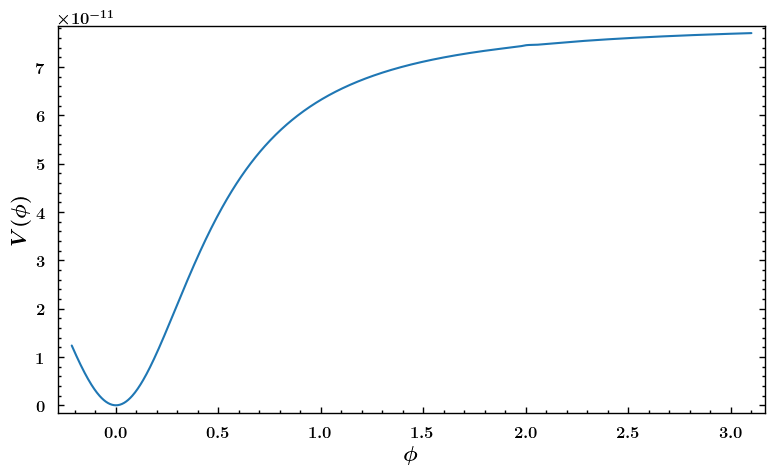

In [4]:
potential.plot_potential(min(phi), max(phi), dpi= 100, save = True)

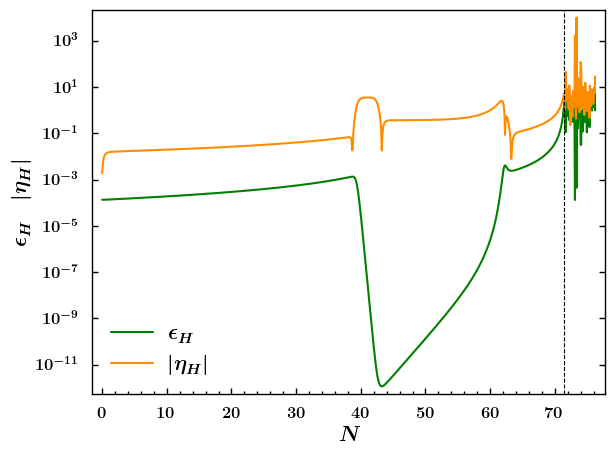

In [5]:
plt.plot(N, eps_H, label = r'$\epsilon_H$', color = 'green' )
plt.plot(N, abs(eta_H), label = r'$|\eta_H |$', color = 'darkorange')
plt.axvline(Nend, linestyle = 'dashed', linewidth = 0.8, color = 'k')

plt.yscale('log')
plt.xlabel(r'$N$')
plt.ylabel(r'$\epsilon_H\quad |\eta_H|$')
plt.legend(loc = 3)
#plt.title('Slow-roll parameters')
plt.tight_layout()


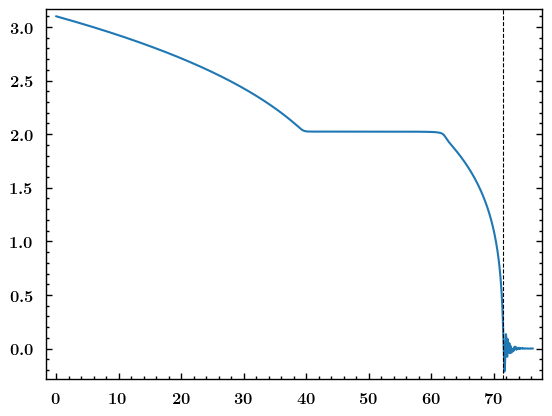

In [6]:
plt.plot(N, phi)
plt.axvline(Nend, linestyle = 'dashed', linewidth = 0.8, color = 'k')


In [7]:
pert = Perturbations(potential, background, scale= 'PBH', N_CMB = 60)
k_pivot = pert.k_CMB
Npivot = pert.N_hc(k = k_pivot)
print(f'El modo {k_pivot} cruza el horizonte a {Npivot[0]} e-folds')
sol = pert.solver()

El modo 0.05 cruza el horizonte a 11.431431431431434 e-folds


In [8]:
#Extrayendo datos de la clase perturbations

variables = ['N', 'R_re', 'dRdN_re','R_im', 'dRdN_im', 
                'h_re', 'dhdN_re', 'h_im', 'dhdN_im','P_s', 'P_t', 'P_s_pivot', 'P_t_pivot', 'r_pivot']
N, R_re, dRdN_re, R_im, dRdN_im, h_re, dhdN_re, h_im, dhdN_im, P_s, P_t, P_s_pivot, P_t_pivot, r_pivot = (pert.data[i] for i in variables)


In [9]:
P_s_pivot, P_t_pivot, r_pivot

(1.681509295014107e-09, 5.1610434496862194e-12, 0.003069292251306242)

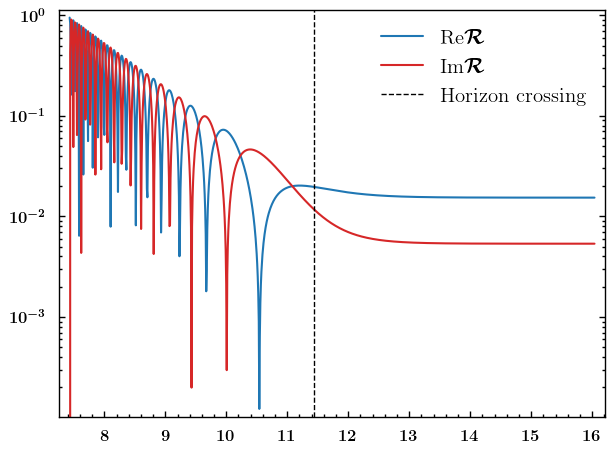

In [10]:
plt.semilogy(N, abs(R_re), label = r'$\text{Re}\mathcal{R}$')
plt.semilogy(N, abs(R_im), label = r'$\text{Im}\mathcal{R}$')
plt.axvline(Npivot[0], linewidth = 1, linestyle = 'dashed', color = 'k', label = 'Horizon crossing')
plt.tight_layout()
plt.legend()


In [11]:
PS = pert.Power_spectrum(save=True)

k_peak = 3.02\times 10^{+11} Mpc^-1
N_peak = 40.87659466202854
P_s(k_peak) = 2.724202450648556
Figure saved as: Figures/spectrum_scalar.png


<Figure size 800x500 with 0 Axes>

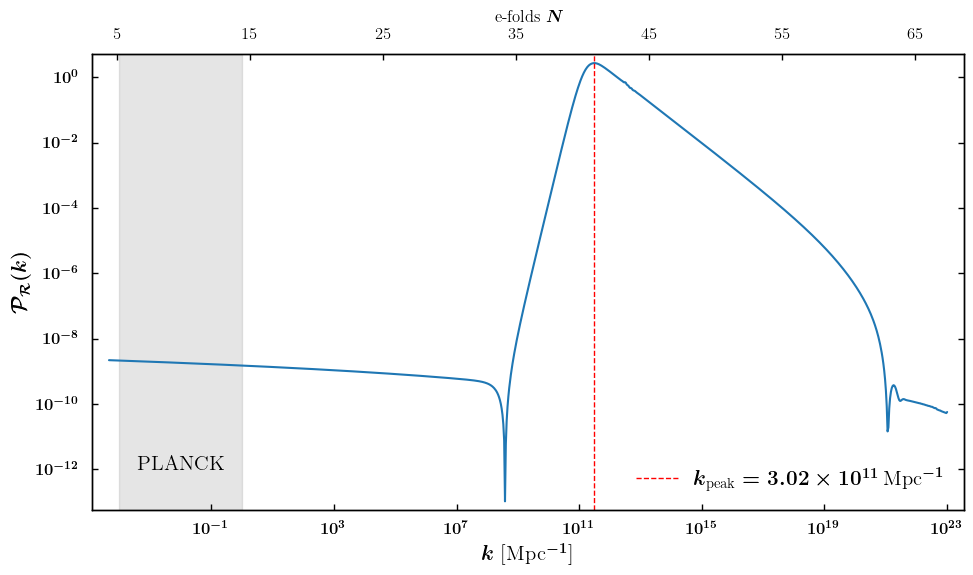

In [12]:
pert.Plot_spectrum(dpi = 100, spectrum = 'scalar', save=True)

In [13]:
print(pert.Spectral_tilts)

{'n_s': 0.9602491348389753, 'n_t': -0.0004801834889386538}


In [14]:
pbh = PBHAbundance(pert)
mPBH, fPBH = pbh.fPBH(save=True)

fPBH_peak = 22282248614198.93
MPBH_peak = 9.045925201418311e-13 M⊙


(1e-20, 10000.0)

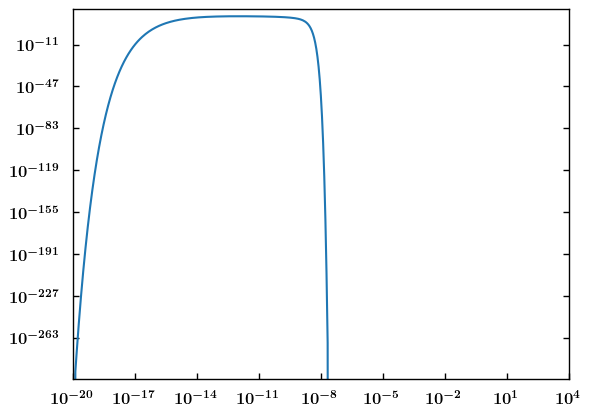

In [15]:
plt.loglog(mPBH, fPBH)
plt.xlim(1e-20, 1e4)